In [34]:
import pandas as pd
import quandl

df = quandl.get('WIKI/GOOGL')

In [35]:
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [36]:
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]

df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close']) / df['Adj. Close'] * 100.0

df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

df = df[['Adj. Close','HL_PCT','PCT_change','Adj. Volume']]

df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume
Date,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0
2004-08-20,54.322689,0.710922,7.227007,22834300.0
2004-08-23,54.869377,3.729433,-1.227880,18256100.0
2004-08-24,52.597363,6.417469,-5.726357,15247300.0
2004-08-25,53.164113,1.886792,1.183658,9188600.0


In [37]:
forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)

import math

forecast_out = int(math.ceil(0.01*len(df)))

In [38]:
df['label'] = df[forecast_col].shift(-forecast_out)
df.dropna(inplace=True)
df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0,69.078238
2004-08-20,54.322689,0.710922,7.227007,22834300.0,67.839414
2004-08-23,54.869377,3.729433,-1.227880,18256100.0,68.912727
2004-08-24,52.597363,6.417469,-5.726357,15247300.0,70.668146
2004-08-25,53.164113,1.886792,1.183658,9188600.0,71.219849


In [39]:
import numpy as np
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression

In [40]:
X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X = X[:-forecast_out]
X_lately = X[-forecast_out:]


df.dropna(inplace=True)
y = np.array(df['label'])

print(len(X), len(y))

3354 3389


In [41]:
y = y[:-forecast_out]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9765178092151744

In [42]:
accuracy = clf.score(X_test, y_test)

In [43]:
forecast_set = clf.predict(X_lately)
print(forecast_set, accuracy, forecast_out)

[1011.75558541 1014.44352173 1013.47363895 1053.56017805 1056.17686411
 1056.34796361 1065.90370752 1066.9431879  1074.05979309 1066.37596394
 1076.6613695  1071.64894722 1068.33467025 1064.85579487 1065.82309649
 1060.37758352 1072.25368222 1059.10425122 1058.63414746 1074.41824421
 1076.18749843 1080.7751377  1096.06795655 1086.5628579  1059.70512878
 1059.43654823 1047.9089892  1034.12509636 1041.32946879 1055.58231093
 1068.13085415 1073.13339745 1076.06305436 1071.76014542 1075.43412157] 0.9765178092151744 35


In [44]:
import datetime
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

df['Forecast'] = np.nan
df.head()


,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label,Forecast
Date,,,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0,69.078238,NaN
2004-08-20,54.322689,0.710922,7.227007,22834300.0,67.839414,NaN
2004-08-23,54.869377,3.729433,-1.227880,18256100.0,68.912727,NaN
2004-08-24,52.597363,6.417469,-5.726357,15247300.0,70.668146,NaN
2004-08-25,53.164113,1.886792,1.183658,9188600.0,71.219849,NaN


In [46]:
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]


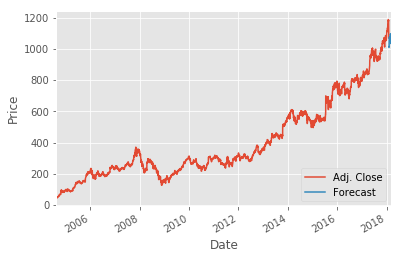

In [47]:
    
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()